IMPORT PYTHON PACKAGES

In [1]:
from ucimlrepo import fetch_ucirepo 
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,ConfusionMatrixDisplay
import time
from sklearn.tree import DecisionTreeClassifier
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.metrics import pairwise_distances
from sklearn.ensemble import RandomForestClassifier

LOAD DATASET

In [2]:
# fetch dataset 
optical_recognition_of_handwritten_digits = fetch_ucirepo(id=80) 
  
# data (as pandas dataframes) 
X = optical_recognition_of_handwritten_digits.data.features 
y = optical_recognition_of_handwritten_digits.data.targets 
feature_names = optical_recognition_of_handwritten_digits.metadata.names
df = pd.DataFrame(data=X, columns=feature_names)
print(df.head())

# split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

   Attribute1  Attribute2  Attribute3  Attribute4  Attribute5  Attribute6  \
0           0           1           6          15          12           1   
1           0           0          10          16           6           0   
2           0           0           8          15          16          13   
3           0           0           0           3          11          16   
4           0           0           5          14           4           0   

   Attribute7  Attribute8  Attribute9  Attribute10  ...  Attribute55  \
0           0           0           0            7  ...            0   
1           0           0           0            7  ...            3   
2           0           0           0            1  ...            0   
3           0           0           0            0  ...            0   
4           0           0           0            0  ...           12   

   Attribute56  Attribute57  Attribute58  Attribute59  Attribute60  \
0            0            0       

MODEL ONE: LOGISTIC REGRESSION

/home/codespace/.local/lib/python3.10/site-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


/home/codespace/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


training time: 0.5065996646881104
query time: 0.0023865699768066406
training accuracy is 0.997864768683274
testing accuracy is 0.9629893238434164


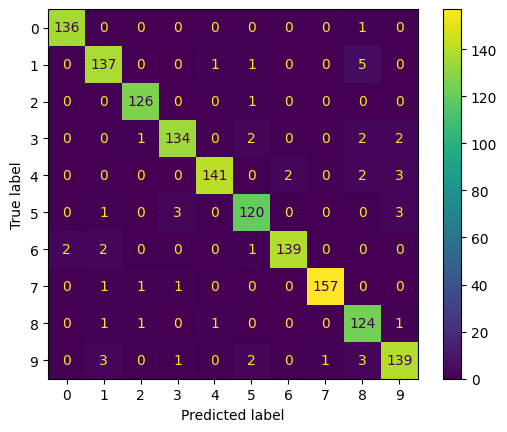

In [3]:
# training the model and timing it
logistic_regression = LogisticRegression()
start = time.time()
logistic_regression.fit(X_train, y_train)
end = time.time()
train_time = (end-start)
print(f"training time: {train_time}")

# testing the model and timing it
test_start = time.time()
test_pred = logistic_regression.predict(X_test)
test_end = time.time()
test_time =  (test_end-test_start)
print(f"query time: {test_time}")

# accuracy
training_accuracy = logistic_regression.score(X_train, y_train)
print(f"training accuracy is {training_accuracy}")
testing_accuracy = logistic_regression.score(X_test, y_test)
print(f"testing accuracy is {testing_accuracy}")

# visual- confusion matrix
cm  = confusion_matrix(y_test,test_pred)
disp = ConfusionMatrixDisplay(confusion_matrix = cm,display_labels=logistic_regression.classes_)
disp.plot()
plt.show()


MODEL TWO: DECISION TREE

Score of testing is: 0.90
Score of training is: 1.00
training time: 0.04439258575439453
query time: 0.0018093585968017578
Score of testing is: 0.89
Score of training is: 0.95


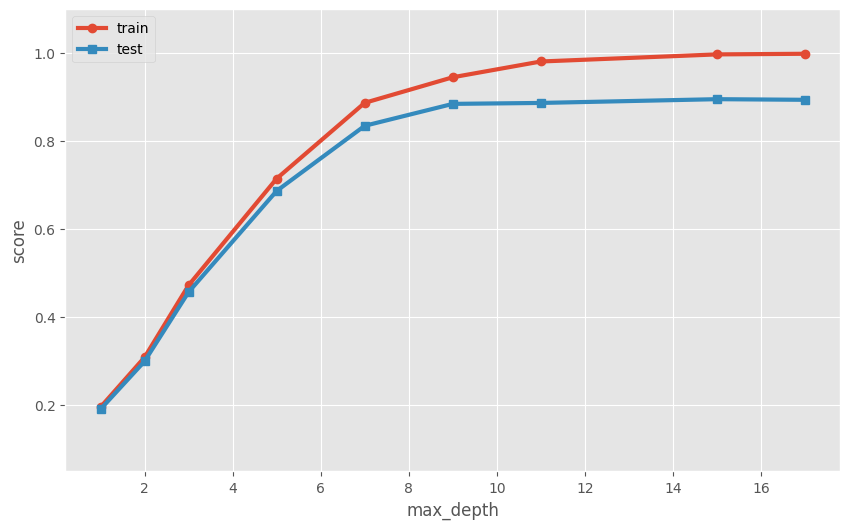

In [4]:
# create a decision tree with default parameters and check the accuracy
tree = DecisionTreeClassifier(random_state=42)
tree.fit(X_train, y_train)
test_score = tree.score(X_test, y_test)
print(f"Score of testing is: {test_score:.2f}")
train_score = tree.score(X_train, y_train)
print(f"Score of training is: {train_score:.2f}")

# experiment with max depth
max_depths = np.array([1, 2, 3, 5, 7, 9, 11, 15, 17])
train_score = []
test_score = []
for d in max_depths:
    tree = DecisionTreeClassifier(random_state=42, max_depth=d)
    tree.fit(X_train, y_train)
    testscore = tree.score(X_test, y_test)
    test_score.append(testscore)
    trainscore = tree.score(X_train, y_train)
    train_score.append(trainscore)

# visual of graph
plt.style.use('ggplot')
plt.figure(figsize=(10, 6))
plt.plot(max_depths, train_score, 'o-', linewidth=3, label='train')
plt.plot(max_depths, test_score, 's-', linewidth=3, label='test')
plt.xlabel('max_depth')
plt.ylabel('score')
plt.ylim(0.05, 1.1)
plt.legend()

# create a decision tree with optimal max depth and time it
tree = DecisionTreeClassifier(random_state=42, max_depth=9)

# training the model and timing it
start = time.time()
tree.fit(X_train, y_train)
end = time.time()
train_time = (end-start)
print(f"training time: {train_time}")

# testing the model and timing it
test_start = time.time()
test_pred = tree.predict(X_test)
test_end = time.time()
test_time =  (test_end-test_start)
print(f"query time: {test_time}")

#accuracy
test_score = tree.score(X_test, y_test)
print(f"Score of testing is: {test_score:.2f}")
train_score = tree.score(X_train, y_train)
print(f"Score of training is: {train_score:.2f}")
 

MODEL THREE: K-NEAREST NEIGHBORS   

/home/codespace/.local/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/home/codespace/.local/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/home/codespace/.local/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/home/codespace/.local/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Pl

manhattan training time: 0.005540609359741211
manhattan query time: 0.36191344261169434
manhattan training accuracy is 0.9928825622775801
manhattan testing accuracy is 0.9850533807829182
euclidean training time: 0.004996776580810547


/home/codespace/.local/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


euclidean query time: 0.2052459716796875
euclidean training accuracy is 0.9933570581257414
euclidean testing accuracy is 0.9864768683274021
cosine training time: 0.005171775817871094


/home/codespace/.local/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


cosine query time: 0.29045701026916504
cosine training accuracy is 0.9940688018979834
cosine testing accuracy is 0.9864768683274021


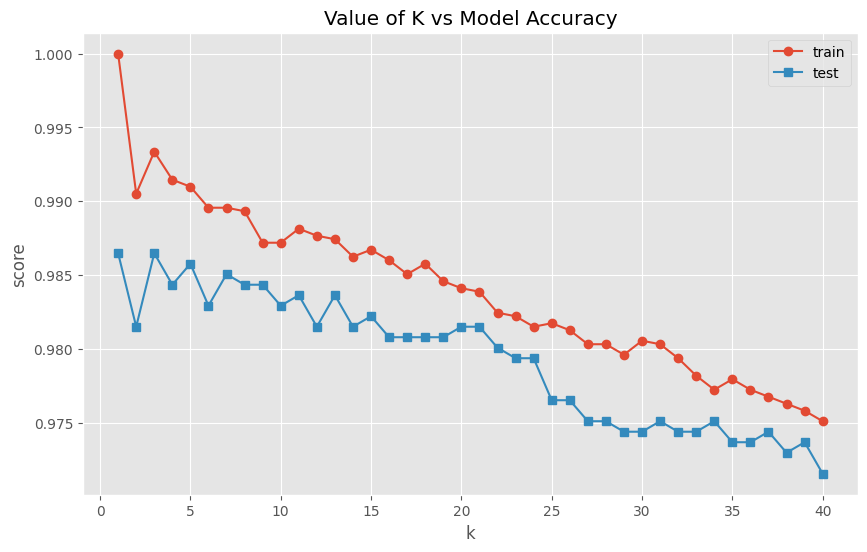

In [5]:
# determine optimal value for k
ks = range(1,41)
train_score = []
test_score = []
for k in ks:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    train_pred= knn.predict(X_train)
    current_train_score = metrics.accuracy_score(y_train, train_pred)
    train_score.append(current_train_score)
    test_pred = knn.predict(X_test)
    current_test_score = metrics.accuracy_score(y_test, test_pred)
    # current_test_score = knn.score(X_test, y_test)
    test_score.append(current_test_score)

# Plotting the results
plt.figure(figsize=(10, 6))
plt.plot(ks , train_score, 'o-', label='train')
plt.plot(ks , test_score, 's-', label='test')
plt.xlabel('k')
plt.ylabel('score')
plt.title('Value of K vs Model Accuracy')
plt.legend()

# accuracy and time of the MANHATTAN metric
m_knn = KNeighborsClassifier(n_neighbors=3, metric='manhattan')
# training the model and timing it
start = time.time()
m_knn.fit(X_train, y_train)
end = time.time()
train_time = (end-start)
print(f"manhattan training time: {train_time}")
# testing the model and timing it
test_start = time.time()
test_pred = m_knn.predict(X_test)
test_end = time.time()
test_time =  (test_end-test_start)
print(f"manhattan query time: {test_time}")
# accuracy
training_accuracy = m_knn.score(X_train, y_train)
print(f"manhattan training accuracy is {training_accuracy}")
testing_accuracy = m_knn.score(X_test, y_test)
print(f"manhattan testing accuracy is {testing_accuracy}")


# accuracy and time of the EUCLIDEAN metric
e_knn = KNeighborsClassifier(n_neighbors=3, metric='euclidean')
# training the model and timing it
start = time.time()
e_knn.fit(X_train, y_train)
end = time.time()
train_time = (end-start)
print(f"euclidean training time: {train_time}")
# testing the model and timing it
test_start = time.time()
test_pred = e_knn.predict(X_test)
test_end = time.time()
test_time =  (test_end-test_start)
print(f"euclidean query time: {test_time}")
# accuracy
training_accuracy = e_knn.score(X_train, y_train)
print(f"euclidean training accuracy is {training_accuracy}")
testing_accuracy = e_knn.score(X_test, y_test)
print(f"euclidean testing accuracy is {testing_accuracy}")

# accuracy and time of the COSINE metric
c_knn = KNeighborsClassifier(n_neighbors=3, metric='cosine')
# training the model and timing it
start = time.time()
c_knn.fit(X_train, y_train)
end = time.time()
train_time = (end-start)
print(f"cosine training time: {train_time}")
# testing the model and timing it
test_start = time.time()
test_pred = c_knn.predict(X_test)
test_end = time.time()
test_time =  (test_end-test_start)
print(f"cosine query time: {test_time}")
# accuracy
training_accuracy = c_knn.score(X_train, y_train)
print(f"cosine training accuracy is {training_accuracy}")
testing_accuracy = c_knn.score(X_test, y_test)
print(f"cosine testing accuracy is {testing_accuracy}")

MODEL FOUR: RANDOM FOREST

/home/codespace/.local/lib/python3.10/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/home/codespace/.local/lib/python3.10/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/home/codespace/.local/lib/python3.10/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/home/codespace/.local/lib/python3.10/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change

training time: 0.7560224533081055
query time: 0.023004531860351562
Training accuracy of the forest: 1.000
Testing accuracy of the forest: 0.980


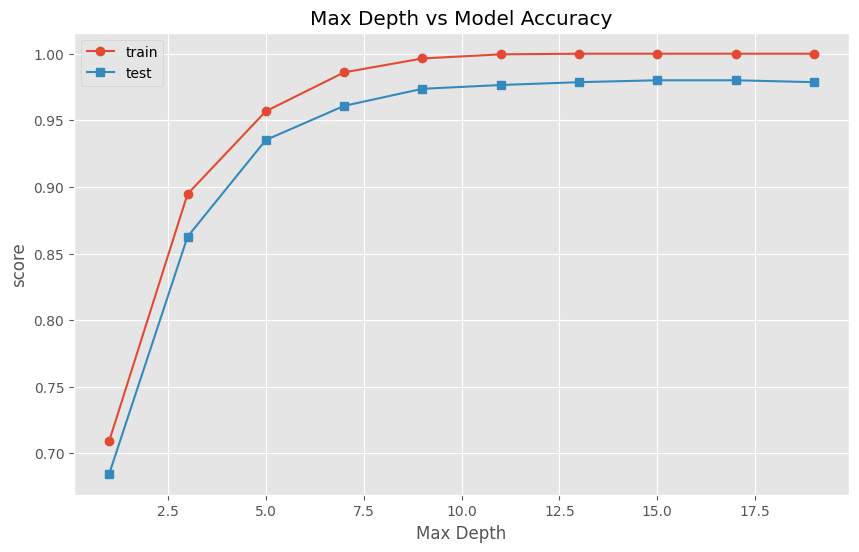

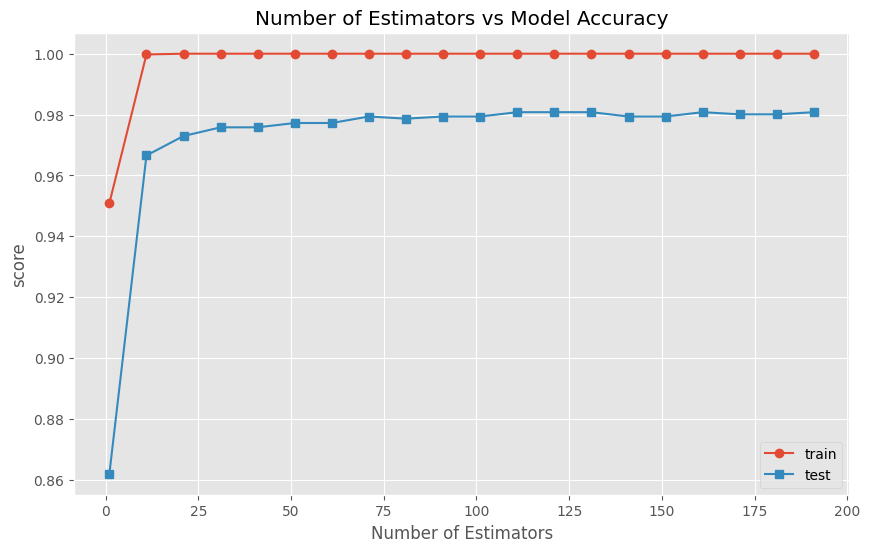

In [6]:
# find best max_depth
train_score = []
test_score = []
ks = range(1,20,2)
for i, k in enumerate(ks):
    rf = RandomForestClassifier(random_state = 42, max_depth = k)
    rf.fit(X_train, y_train)
    train_score.append(rf.score(X_train, y_train))
    test_score.append(rf.score(X_test, y_test))

# Plotting the results
plt.figure(figsize=(10, 6))
plt.plot(ks , train_score, 'o-', label='train')
plt.plot(ks , test_score, 's-', label='test')
plt.xlabel('Max Depth')
plt.ylabel('score')
plt.title('Max Depth vs Model Accuracy')
plt.legend()

# best n-estimators, using best max_depth
train_score = []
test_score = []
ns = range(1,200,10)
for i, n in enumerate(ns):
    rf = RandomForestClassifier(random_state = 42, max_depth = 15, n_estimators = n)
    rf.fit(X_train, y_train)
    train_score.append(rf.score(X_train, y_train))
    test_score.append(rf.score(X_test, y_test))
    
# plotting the results
plt.figure(figsize=(10, 6))
plt.plot(ns , train_score, 'o-', label='train')
plt.plot(ns , test_score, 's-', label='test')
plt.xlabel('Number of Estimators')
plt.ylabel('score')
plt.title('Number of Estimators vs Model Accuracy')
plt.legend()

# random forest using best max_depth and n-estimators
rf = RandomForestClassifier(random_state = 42, max_depth = 15, n_estimators = 125)

# training the model and timing it
start = time.time()
rf.fit(X_train, y_train)
end = time.time()
train_time = (end-start)
print(f"training time: {train_time}")

# testing the model and timing it
test_start = time.time()
test_pred = rf.predict(X_test)
test_end = time.time()
test_time =  (test_end-test_start)
print(f"query time: {test_time}")

print(f"Training accuracy of the forest: {rf.score(X_train, y_train):.3f}")
print(f"Testing accuracy of the forest: {rf.score(X_test, y_test):.3f}")


CONFUSION MATRIX FOR BEST TEST ACCURACY

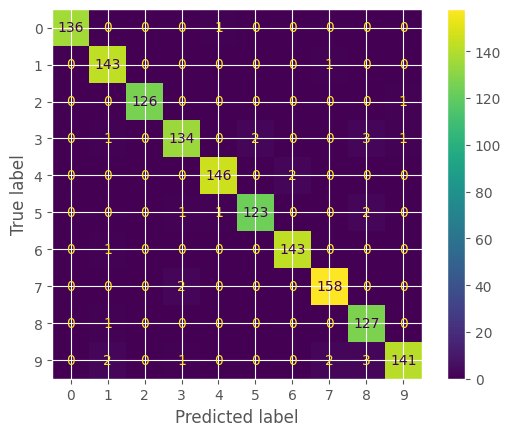

In [7]:
# KNN with the Cosine Metric
c_knn = KNeighborsClassifier(n_neighbors=3, metric='cosine')
cm  = confusion_matrix(y_test,test_pred)
disp = ConfusionMatrixDisplay(confusion_matrix = cm)
disp.plot()
plt.show()